In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV


# To build linear regression_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [675]:
df=pd.read_csv('Holiday_Package (2).csv')

In [676]:
df.head(5)

,Unnamed: 0,Holiday_Package,Salary,age,education,number_of_young_children,number_of_older_children,foreigner
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [677]:
df.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [678]:
df.head(10)

,Holiday_Package,Salary,age,education,number_of_young_children,number_of_older_children,foreigner
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


In [679]:
df.shape

(872, 7)

In [680]:
df.isnull().sum()

Holiday_Package             0
Salary                      0
age                         0
education                   0
number_of_young_children    0
number_of_older_children    0
foreigner                   0
dtype: int64

In [681]:
df.duplicated().sum()

0

In [682]:
print('Number of duplicated values in the dataset=', df.duplicated().sum())

Number of duplicated values in the dataset= 0


In [683]:
df.describe()

,Salary,age,education,number_of_young_children,number_of_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Holiday_Package           872 non-null    object
 1   Salary                    872 non-null    int64 
 2   age                       872 non-null    int64 
 3   education                 872 non-null    int64 
 4   number_of_young_children  872 non-null    int64 
 5   number_of_older_children  872 non-null    int64 
 6   foreigner                 872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


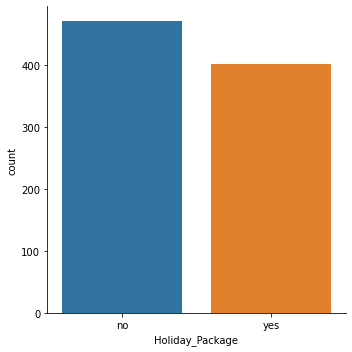

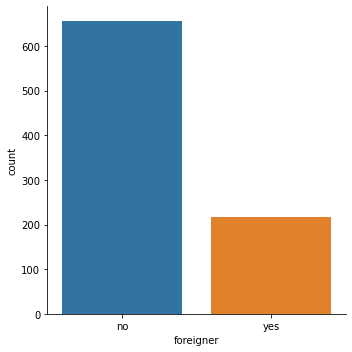

In [685]:
sns.catplot(x= 'Holiday_Package',data=df, kind= 'count')
sns.catplot(x='foreigner',data=df, kind='count');

In [686]:
df.Holiday_Package.value_counts()

no     471
yes    401
Name: Holiday_Package, dtype: int64

In [687]:
df.foreigner.value_counts()

no     656
yes    216
Name: foreigner, dtype: int64

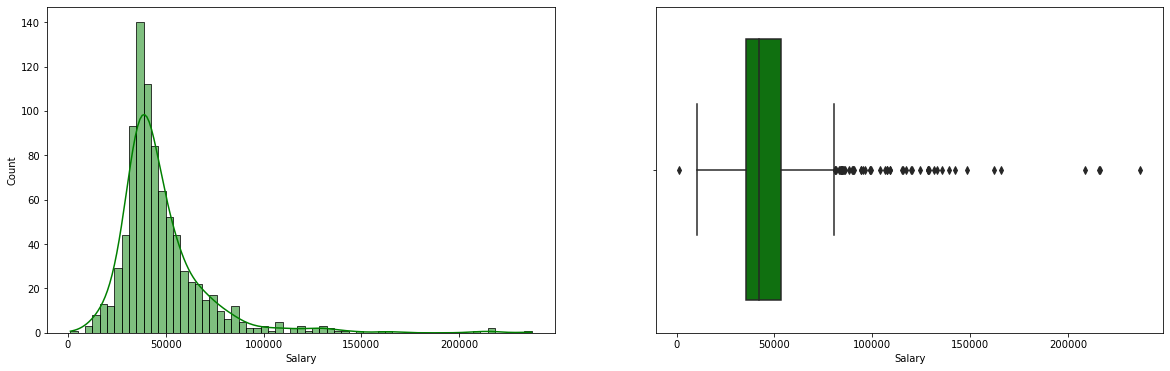

In [688]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'Salary' ,data=df, kde=True, ax=axs[0], color='green')
sns.boxplot(x='Salary',data=df, ax=axs[1], color='green');

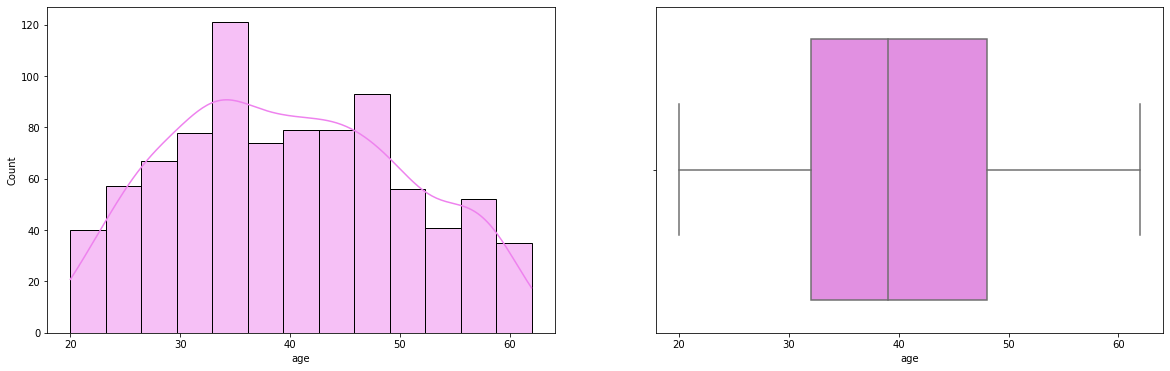

In [689]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'age' ,data=df, kde=True, ax=axs[0], color='violet')
sns.boxplot(x='age',data=df, ax=axs[1], color='violet');

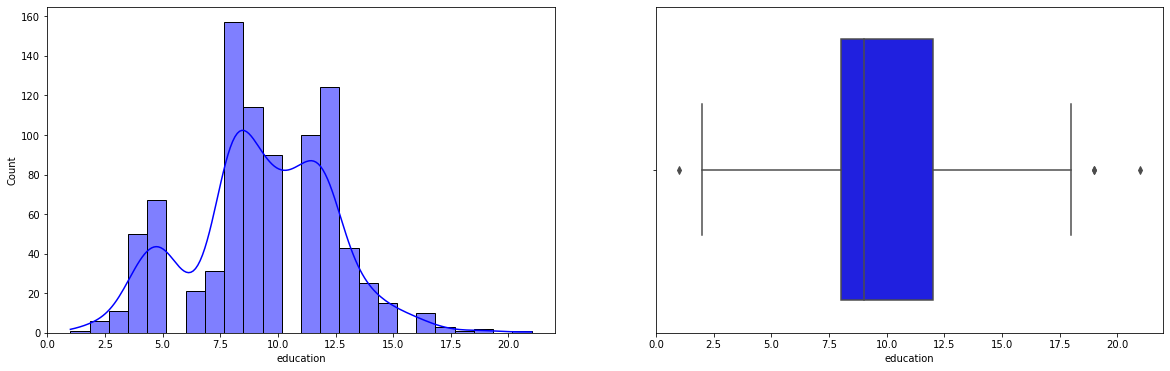

In [690]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'education' ,data=df, kde=True, ax=axs[0], color='blue')
sns.boxplot(x='education',data=df, ax=axs[1], color='blue');

### Treating the dataset for Logistic Regression models and Linear Discriminant Analysis:
### Treating outliers in the columns, Encoding string values, split and conducting analysis. 

In [691]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holiday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreigner
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


Treating outliers

In [692]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [693]:
lr,ur=remove_outlier(df['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


In [694]:
lr,ur=remove_outlier(df['education'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['education']=np.where(df['education']>ur,ur,df['education'])
df['education']=np.where(df['education']<lr,lr,df['education'])

Lower Range : 2.0 
Upper Range : 18.0


After treating outliers:

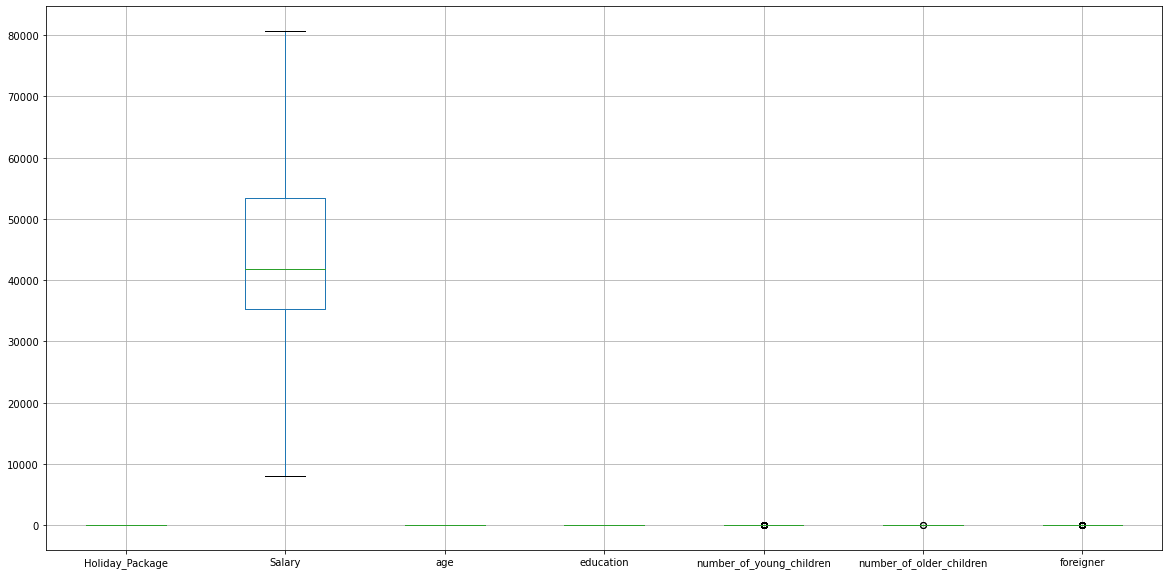

In [695]:
df.boxplot(figsize=(20,10));

In [696]:
df.head(10)

,Holiday_Package,Salary,age,education,number_of_young_children,number_of_older_children,foreigner
0,0,48412.00,30,8.0,1,1,0
1,1,37207.00,45,8.0,0,1,0
2,0,58022.00,46,9.0,0,0,0
3,0,66503.00,31,11.0,2,0,0
4,0,66734.00,44,12.0,0,2,0
5,1,61590.00,42,12.0,0,1,0
6,0,80687.75,51,8.0,0,0,0
7,1,35987.00,32,8.0,0,2,0
8,0,41140.00,39,12.0,0,0,0
9,0,35826.00,43,11.0,0,2,0


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Holiday_Package           872 non-null    int8   
 1   Salary                    872 non-null    float64
 2   age                       872 non-null    int64  
 3   education                 872 non-null    float64
 4   number_of_young_children  872 non-null    int64  
 5   number_of_older_children  872 non-null    int64  
 6   foreigner                 872 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 35.9 KB


In [698]:
c = df.corr().abs() 
s = c.unstack() 
so = s.sort_values(ascending=False)
so=so[(so<1) & (so>0.25)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

,,correlation
age,number_of_young_children,0.519093
foreigner,education,0.420922
Salary,education,0.352913
Holiday_Package,foreigner,0.254096


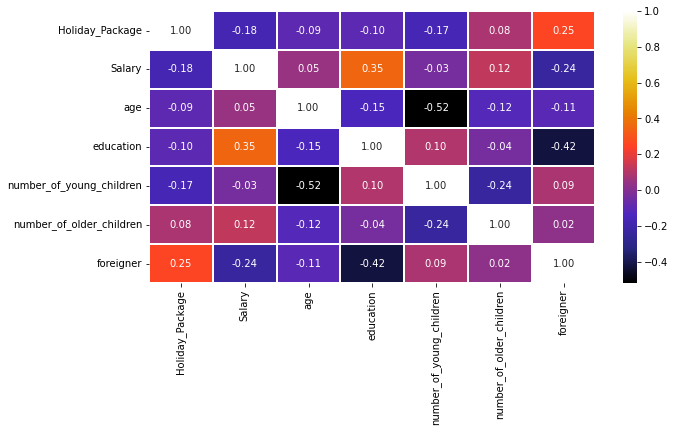

In [699]:
corr = df.corr()
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',cmap='CMRmap',ax=ax)
plt.show()

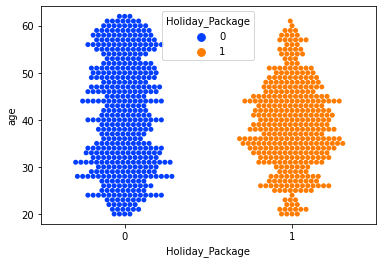

In [700]:
sns.swarmplot(
    x='Holiday_Package', 
    y='age', 
    data=df, 
    palette='bright', hue='Holiday_Package');

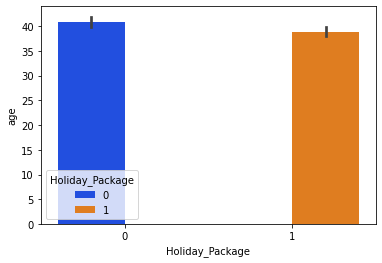

In [701]:
sns.barplot(
    x='Holiday_Package', 
    y='age', 
    data=df, 
    palette='bright', hue='Holiday_Package');

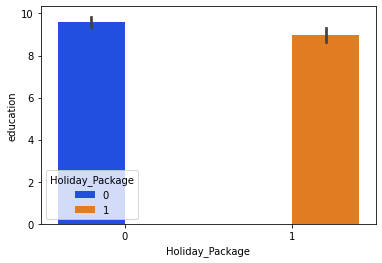

In [702]:
sns.barplot(
    x='Holiday_Package', 
    y='education', 
    data=df, 
    palette='bright', hue='Holiday_Package');

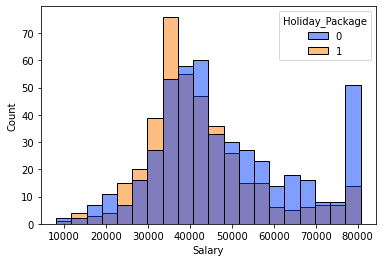

In [703]:
sns.histplot(
    x='Salary', 
    data=df, 
    palette='bright', hue='Holiday_Package');

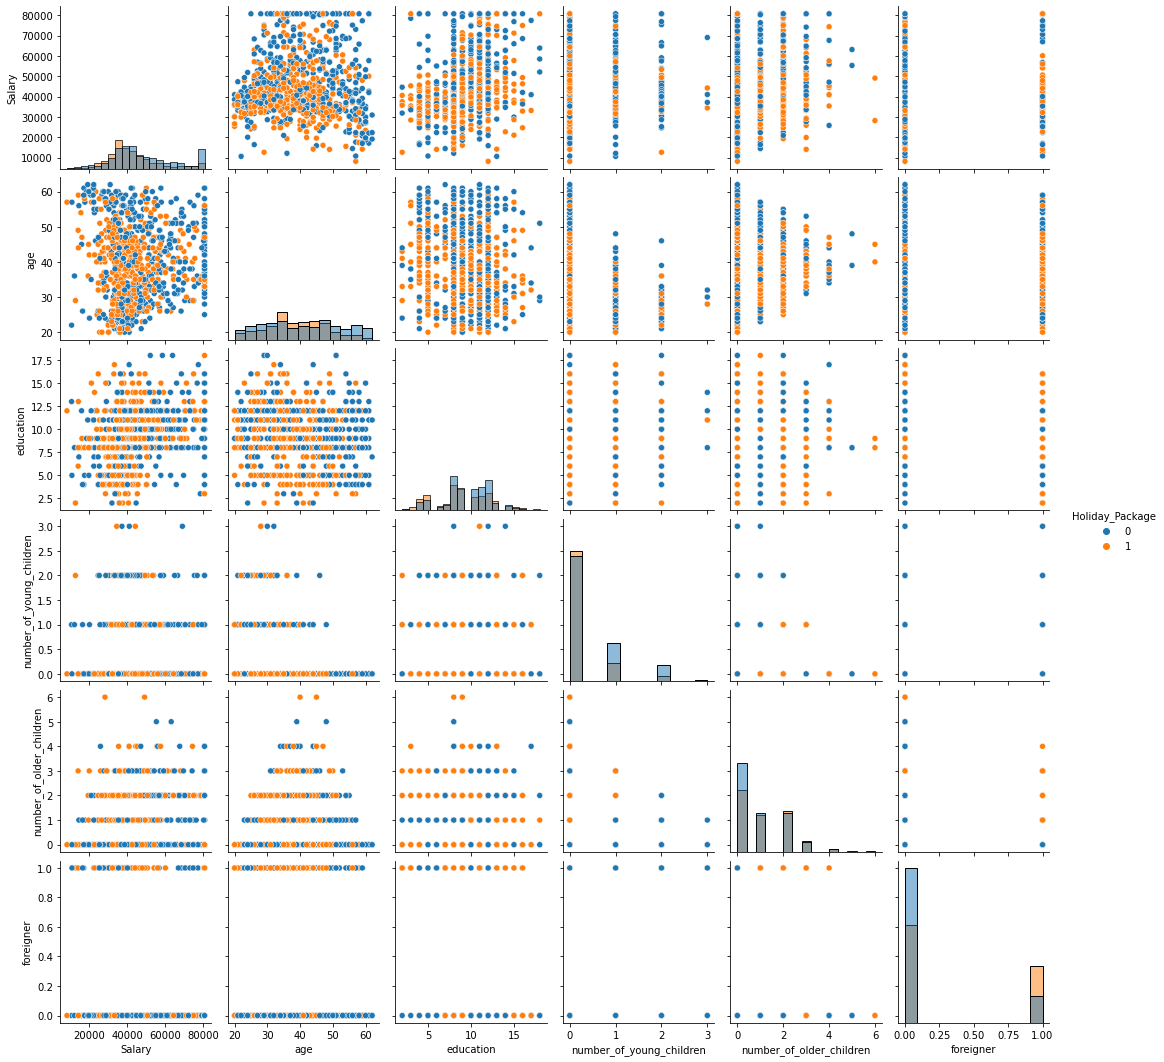

In [704]:
sns.pairplot(df ,diag_kind='hist' ,hue='Holiday_Package');

In [705]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holiday_Package', axis=1)

# Copy target into the y dataframe. 
y = df[['Holiday_Package']]

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify= df['Holiday_Package'])

In [707]:
y_train.value_counts()

Holiday_Package
0                  329
1                  281
dtype: int64

In [708]:
y_test.value_counts()

Holiday_Package
0                  142
1                  120
dtype: int64

In [709]:
X_train.head()

,Salary,age,education,number_of_young_children,number_of_older_children,foreigner
821,38974.0,47,12.0,0,2,1
805,40270.0,33,8.0,2,0,1
322,32573.0,30,11.0,1,0,0
701,43839.0,43,11.0,0,1,1
773,33060.0,40,5.0,1,1,1


In [710]:
X_test.head()

,Salary,age,education,number_of_young_children,number_of_older_children,foreigner
264,25118.0,58,8.0,0,0,0
189,40913.0,20,9.0,1,0,0
643,28446.0,58,8.0,0,0,0
65,36072.0,35,4.0,0,2,0
241,52736.0,40,10.0,0,3,0


### Logistic Regression Model

In [711]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [712]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [713]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677959,0.322041
1,0.535239,0.464761
2,0.692009,0.307991
3,0.489946,0.510054
4,0.571862,0.428138


In [714]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

AUC: 0.733


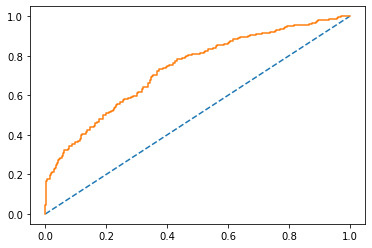

In [715]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [716]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.648854961832061

AUC: 0.733


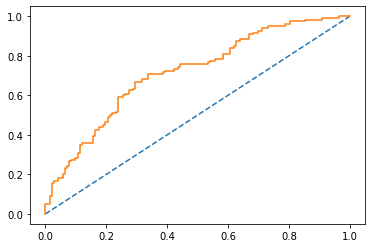

In [717]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC: 0.733
AUC: 0.733


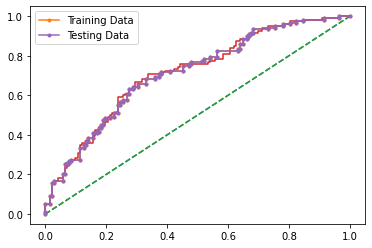

In [718]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Testing Data')

# show the plot
plt.legend(loc='best')
plt.show()

In [719]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

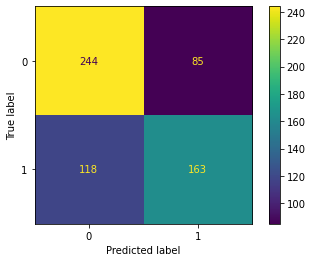

In [720]:
plot_confusion_matrix(model,X_train,y_train);

In [721]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



Confusion Matrix for test data

In [722]:
confusion_matrix(y_test, ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

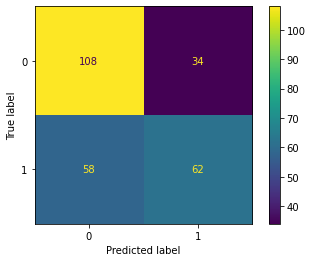

In [723]:
plot_confusion_matrix(model,X_test,y_test);

In [724]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



### Linear Discriminant Analysis

In [725]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()

In [726]:
model_clf=clf.fit(X_train,y_train)
model_clf

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearDiscriminantAnalysis()

In [727]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model_clf.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model_clf.predict(X_test)

In [728]:
model_clf.score(X_train, y_train)

0.659016393442623

In [729]:
model_clf.score(X_test, y_test)

0.648854961832061

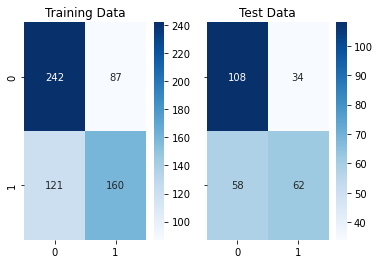

In [730]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [731]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



In [732]:
# Training Data Probability Prediction
pred_prob_train = model_clf.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model_clf.predict_proba(X_test)

In [733]:
pred_prob_train[:,1]

array([0.73551768, 0.28353533, 0.39649058, 0.75922189, 0.47003003,
       0.40177036, 0.36986276, 0.3046299 , 0.60482453, 0.64266073,
       0.23173951, 0.25792362, 0.35900888, 0.04498625, 0.2829094 ,
       0.3643531 , 0.54782489, 0.30634075, 0.58914069, 0.6607117 ,
       0.62795172, 0.26530773, 0.88138953, 0.33411259, 0.08664023,
       0.8271775 , 0.19379564, 0.75733957, 0.53209164, 0.1892203 ,
       0.29258073, 0.3384893 , 0.3769479 , 0.38097484, 0.31056554,
       0.29449197, 0.10973564, 0.56147758, 0.48217964, 0.19474058,
       0.22634057, 0.7985467 , 0.50039742, 0.73794034, 0.7904354 ,
       0.3690023 , 0.30262021, 0.93345931, 0.43331819, 0.72155301,
       0.71677925, 0.45274194, 0.78744639, 0.37233837, 0.19187097,
       0.74091501, 0.25003165, 0.51612541, 0.67432724, 0.35616917,
       0.61002822, 0.52758233, 0.52261599, 0.40993742, 0.57008809,
       0.61654303, 0.12380369, 0.56372873, 0.40105364, 0.27636387,
       0.331064  , 0.74844526, 0.77913611, 0.21862757, 0.44518

AUC for the Training Data: 0.731
AUC for the Test Data: 0.713


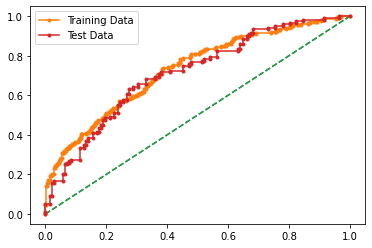

In [734]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Comparison of ROC Curve for Training Data between Logistic Reg Model and LDA Model

AUC: 0.733
AUC for the Training Data: 0.731


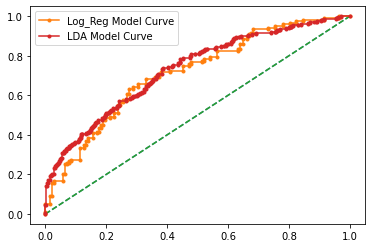

In [735]:
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Log_Reg Model Curve');

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'LDA Model Curve')

# show the plot
plt.legend(loc='best')
plt.show();

### Comparison of ROC Curve for Test Data between Logistic Reg Model and LDA Model

AUC: 0.731
AUC for the Test Data: 0.713


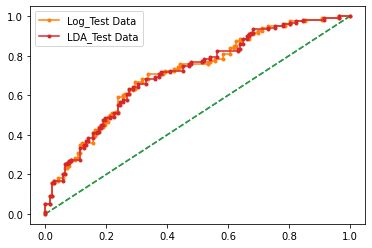

In [736]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,  marker='.',label='Log_Test Data');

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='LDA_Test Data')

# show the plot
plt.legend(loc='best')
plt.show()
